In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

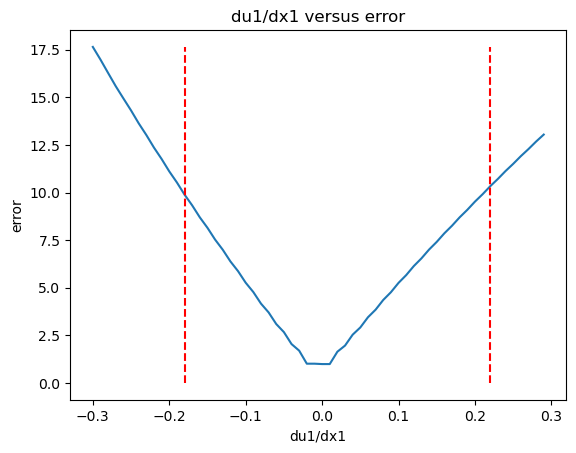

In [184]:
def E_11(du_dx):
    return 0.5 * ((2*du_dx) + (du_dx**2))

def e_11(du_dx):
    return 0.5 * (2*du_dx)


In [213]:
n = 0.30
interval = 0.001
E_11s = np.zeros(int(n/(interval/2)))
e_11s = np.zeros(int(n/(interval/2)))
r = np.arange(-n, n, interval)
i = 0
for du_dx in np.arange(-n, n+interval, interval):
    if (np.round(du_dx, 3) == 0):
        continue
    E_11s[i] = np.round(E_11(du_dx), 6)
    e_11s[i] = np.round(e_11(du_dx), 6)
    i += 1
diffs = E_11s - e_11s
errors = abs(diffs / E_11s) * 100

In [214]:
df = pd.DataFrame({'E_11':E_11s,
                   'e_11':e_11s,
                   'error':errors})

less_than_10 = df.query("error <= 10")
min_bound = min(less_than_10['e_11'])
max_bound = max(less_than_10['e_11'])

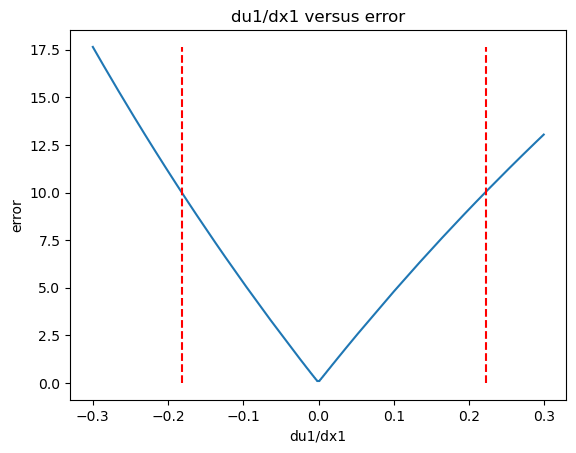

In [215]:
plt.plot(r, errors)
plt.title("du1/dx1 versus error")
plt.xlabel("du1/dx1")
plt.ylabel("error")
plt.vlines([min_bound, max_bound], ymin=0, ymax=max(df['error']), color='red', linestyle='dashed');
plt.savefig("fig.png")

In [216]:
min_bound, max_bound

(-0.181, 0.222)